Linear Regression Implementation:

In [ ]:
import numpy as np

class LinearRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

Testing the Algorithm:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Model evaluation:

MSE: 251.678440831798


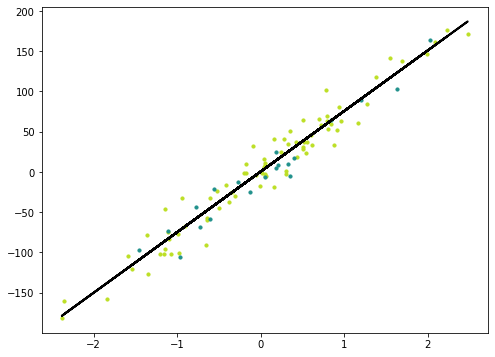

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse = mean_squared_error(y_test, preds)
print("MSE:", mse)

y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

Polynominal Regression:

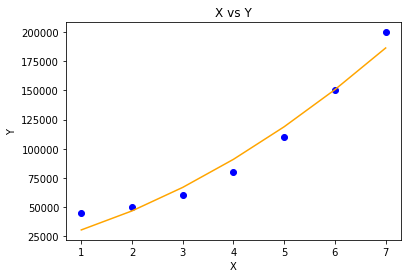

In [ ]:
# Importing libraries

import numpy as np

import math

import matplotlib.pyplot as plt

# Univariate Polynomial Regression

class PolynomailRegression() :

	def __init__( self, degree, learning_rate, iterations ) :

		self.degree = degree

		self.learning_rate = learning_rate

		self.iterations = iterations

	# function to tranform X

	def transform( self, X ) :

		# initialize X_transform

		X_transform = np.ones( ( self.m, 1 ) )

		j = 0

		for j in range( self.degree + 1 ) :

			if j != 0 :

				x_pow = np.power( X, j )

				# append x_pow to X_transform

				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )

		return X_transform

	# function to normalize X_tranform

	def normalize( self, X ) :

		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )

		return X

	# model training

	def fit( self, X, Y ) :

		self.X = X

		self.Y = Y

		self.m, self.n = self.X.shape

		# weight initialization

		self.W = np.zeros( self.degree + 1 )

		# tranform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n

		X_transform = self.transform( self.X )

		# normalize X_transform

		X_normalize = self.normalize( X_transform )

		# gradient descent learning

		for i in range( self.iterations ) :

			h = self.predict( self.X )

			error = h - self.Y

			# update weights

			self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )

		return self

	# predict

	def predict( self, X ) :

		# tranform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n

		X_transform = self.transform( X )

		X_normalize = self.normalize( X_transform )

		return np.dot( X_transform, self.W )


# Driver code

def main() :

	# Create dataset

	X = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )

	Y = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )

	# model training

	model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )

	model.fit( X, Y )

	# Prediction on training set

	Y_pred = model.predict( X )

	# Visualization

	plt.scatter( X, Y, color = 'blue' )

	plt.plot( X, Y_pred, color = 'orange' )

	plt.title( 'X vs Y' )

	plt.xlabel( 'X' )

	plt.ylabel( 'Y' )

	plt.show()


if __name__ == "__main__" :

	main()
